In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bank IPO Performance.csv')

In [3]:
df.head(3)

,GrossSpread,MarketValue,OfferPrice,Shares_offered,Syndicated,Num_underwriters,Day1Perf
0,740600.0,672,48,1150000,0,3,1
1,16351563.0,647,18,12500000,0,10,1
2,11765149.0,475,10,23157895,0,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GrossSpread       1300 non-null   float64
 1   MarketValue       1307 non-null   int64  
 2   OfferPrice        1307 non-null   int64  
 3   Shares_offered    1307 non-null   int64  
 4   Syndicated        1307 non-null   int64  
 5   Num_underwriters  1307 non-null   int64  
 6   Day1Perf          1307 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 71.6 KB


In [5]:
def format_column_names(df):
    """
    Format all column names in a DataFrame to snake_case.

    Parameters:
        df (pandas.DataFrame): DataFrame whose column names are to be formatted.

    Returns:
        pandas.DataFrame: DataFrame with column names formatted to snake_case.
    """
    def camel_to_snake(name):
        # Replace uppercase letters with _ followed by the lowercase version
        return re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()

    formatted_columns = [camel_to_snake(col.replace(' ', '_')) for col in df.columns]
    df.columns = formatted_columns
    return df

In [6]:
df = format_column_names(df)

In [7]:
df.columns

Index(['gross_spread', 'market_value', 'offer_price', 'shares_offered',
       'syndicated', 'num_underwriters', 'day1_perf'],
      dtype='object')

In [8]:
df.apply(lambda col: col.unique())

gross_spread        [740600.0, 16351563.0, 11765149.0, 877675.0, 1...
market_value        [672, 647, 475, 29, 427, 693, 625, 2059, 399, ...
offer_price         [48, 18, 10, 5, 8, 70, 25, 11, 7, 12, 17, 16, ...
shares_offered      [1150000, 12500000, 23157895, 1888888, 1875000...
syndicated                                                     [0, 1]
num_underwriters    [3, 10, 5, 1, 2, 7, 4, 6, 15, 8, 33, 9, 11, 12...
day1_perf                                                   [1, 2, 0]
dtype: object

# EDA

In [9]:
categorical_columns =['syndicated','day1_perf']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

## Univariate

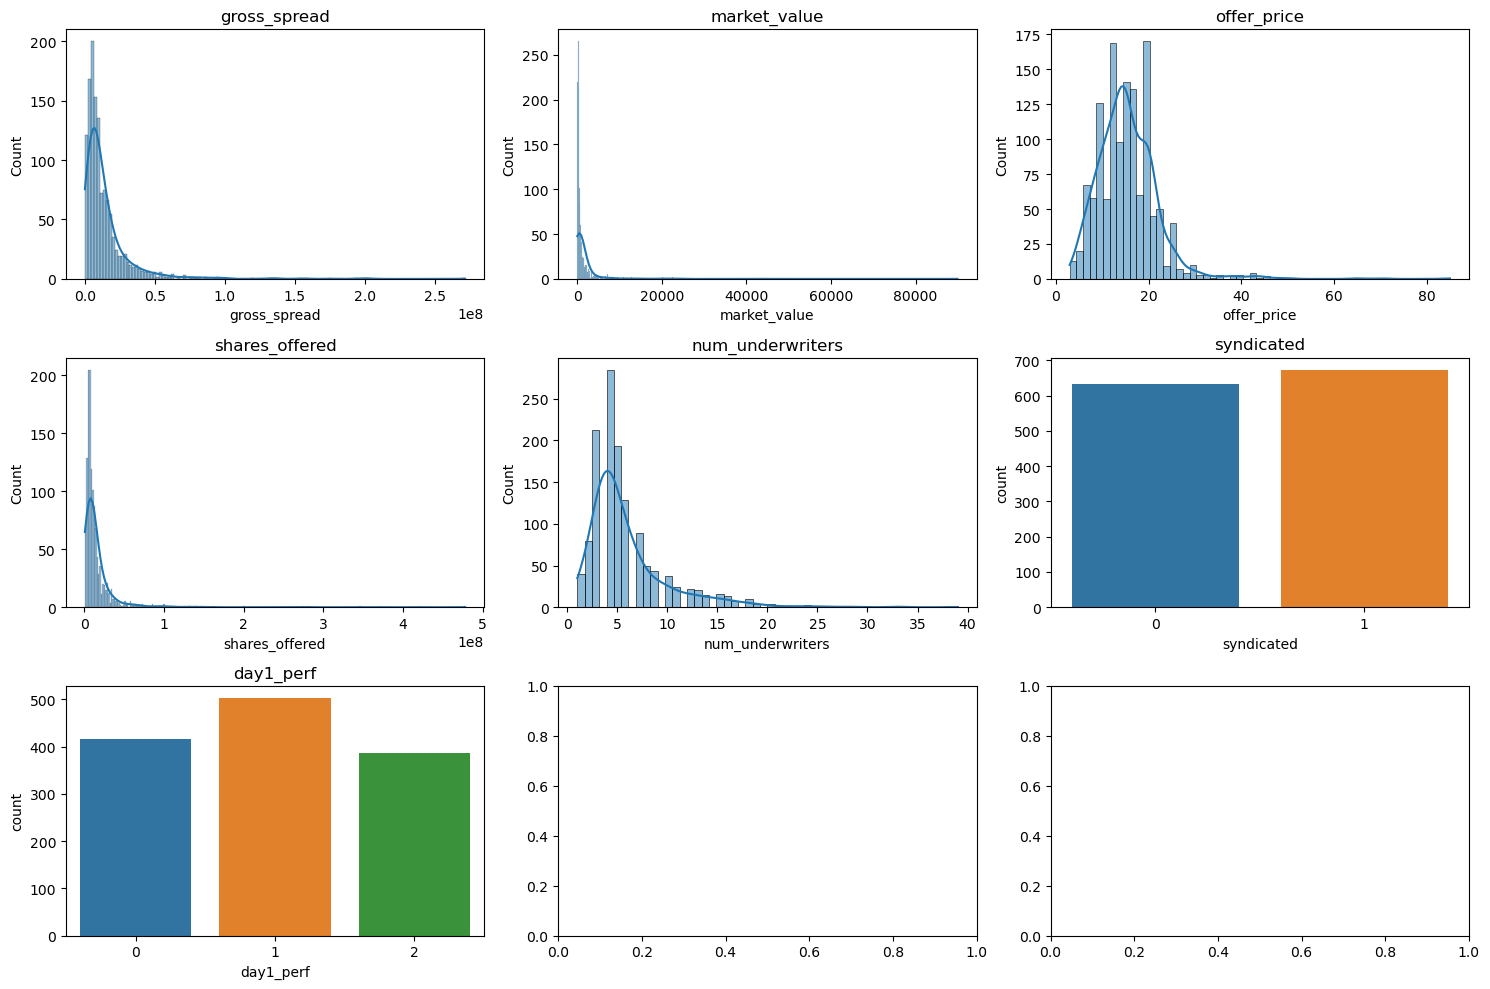

In [10]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

for i, column in enumerate(categorical_columns):
    row = (i + len(numerical_columns)) // num_cols
    col = (i + len(numerical_columns)) % num_cols
    sns.countplot(data=df, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

In [11]:
# Set scientific notation display off
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,gross_spread,market_value,offer_price,shares_offered,syndicated,num_underwriters,day1_perf
count,1300.00,1307.00,1307.00,1307.00,1307.00,1307.00,1307.00
mean,14565741.76,1599.95,15.46,15592040.19,0.52,5.95,0.98
std,20709952.05,5265.14,6.72,30002489.89,0.50,4.18,0.78
min,39454.00,3.00,3.00,525000.00,0.00,1.00,0.00
25%,4770893.75,214.50,11.00,5000000.00,0.00,3.00,0.00
50%,8640000.00,407.00,15.00,8500000.00,1.00,5.00,1.00
75%,16428020.00,1025.00,19.00,15000000.00,1.00,7.00,2.00
max,271530000.00,89922.00,85.00,478000000.00,1.00,39.00,2.00


In [12]:
df['gross_spread'].fillna(df['gross_spread'].median(), inplace=True)

## Bivariate

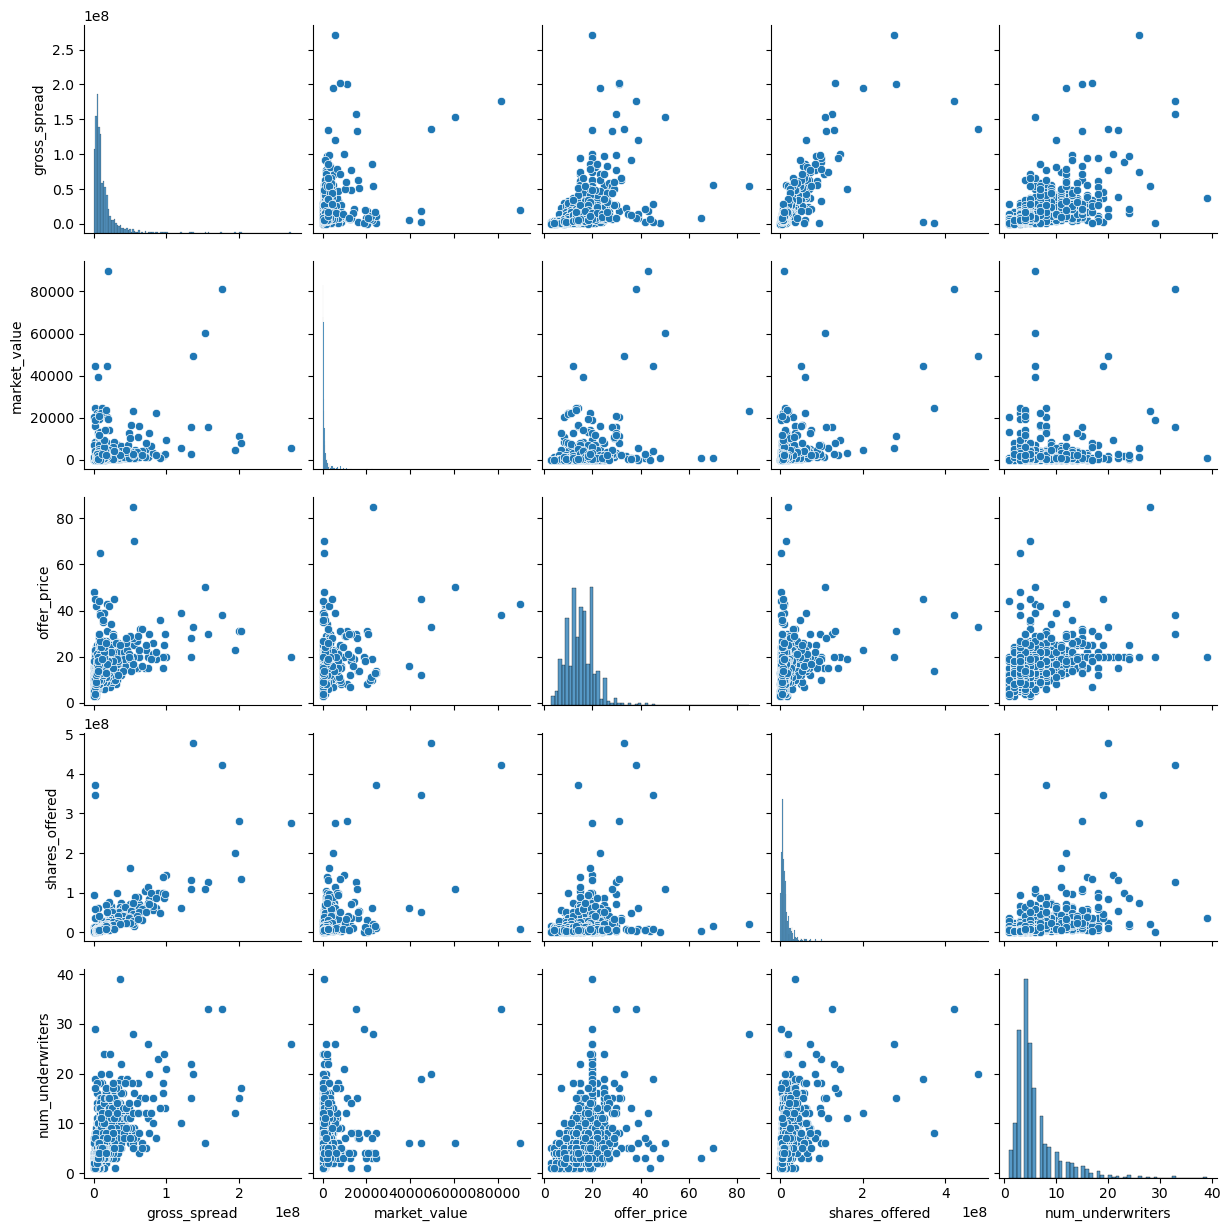

In [13]:
sns.pairplot(df[numerical_columns])

In [14]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=3, ncols=num_plots // 2, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()


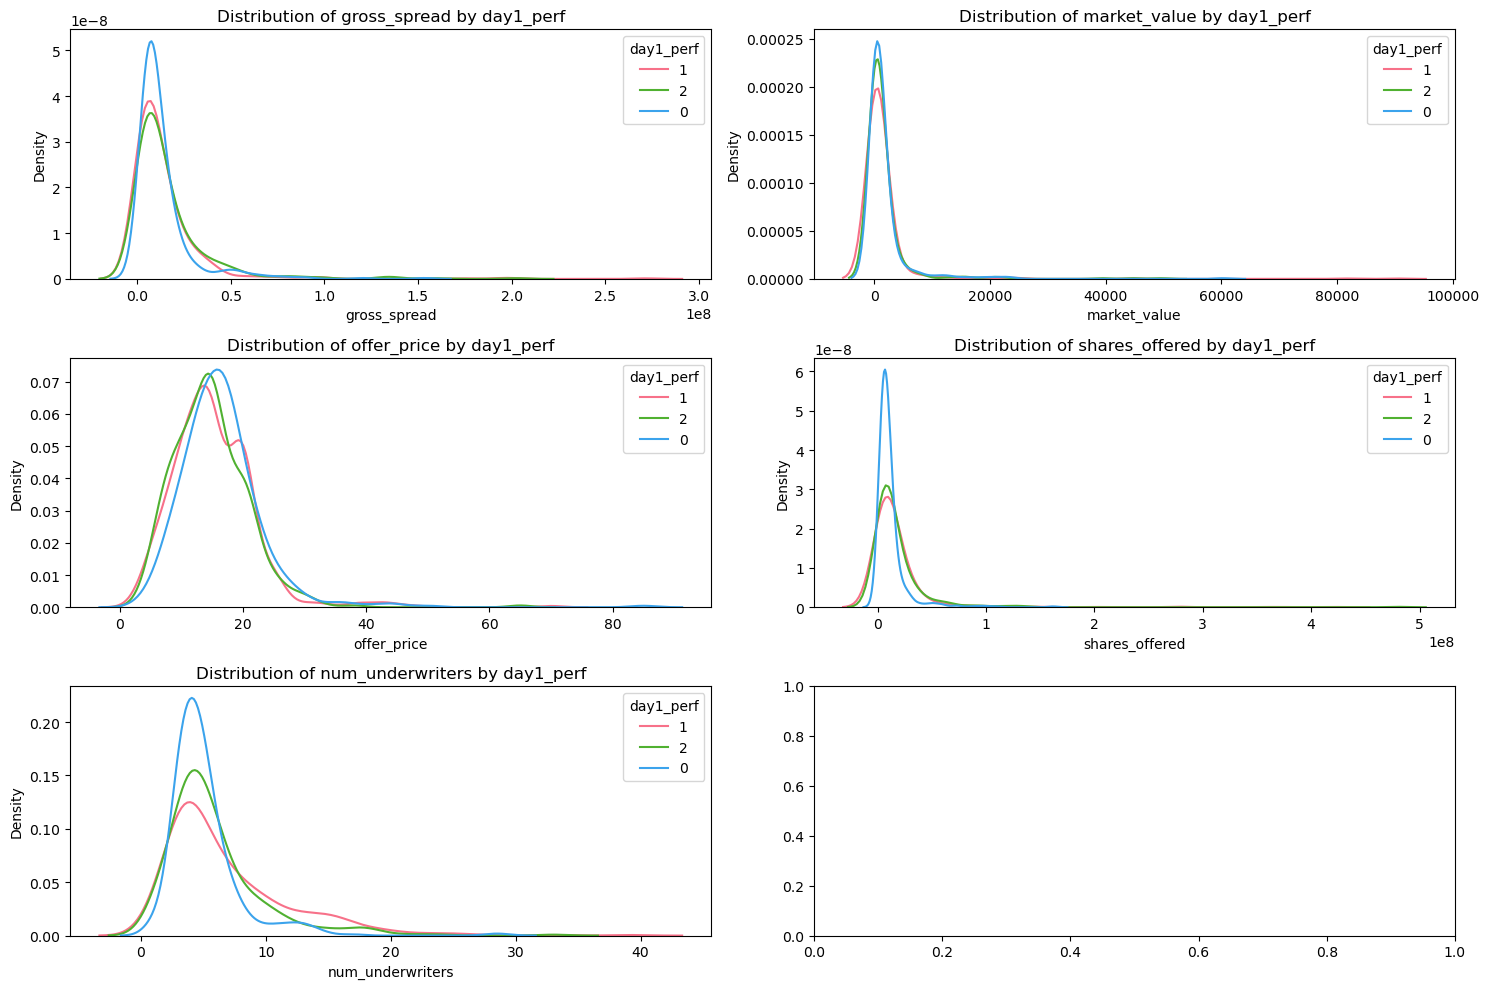

In [15]:
plot_distribution_curves(df.reset_index(drop=True), numerical_columns, hue_column = 'day1_perf')

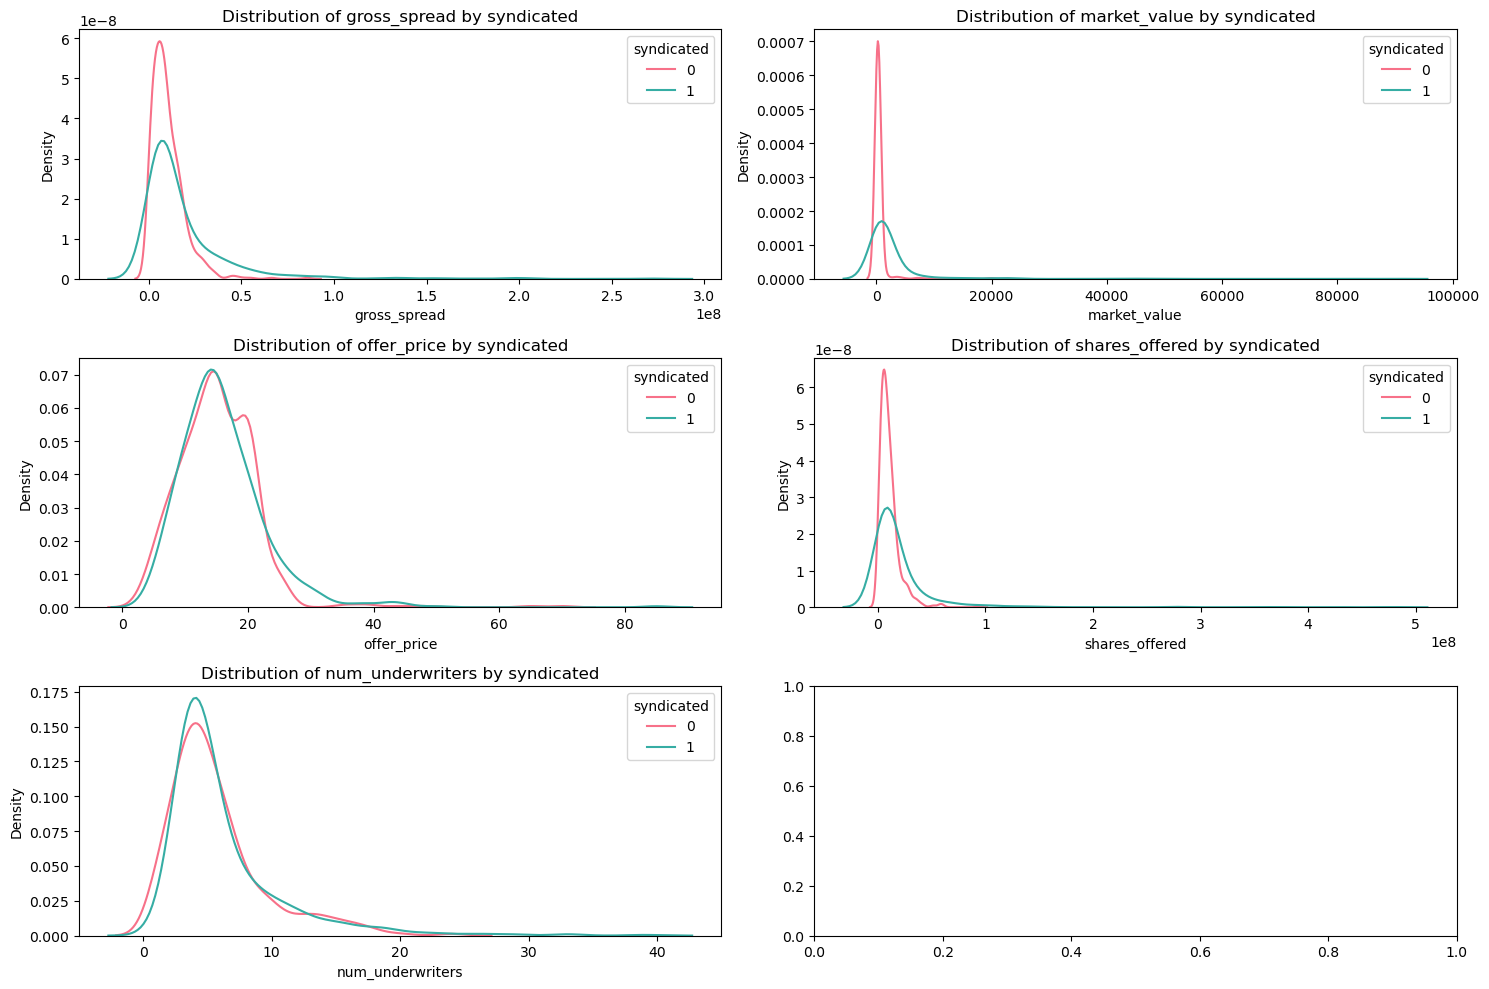

In [16]:
plot_distribution_curves(df.reset_index(drop=True), numerical_columns, hue_column = 'syndicated')

## Multivariate

In [17]:
df.columns

Index(['gross_spread', 'market_value', 'offer_price', 'shares_offered',
       'syndicated', 'num_underwriters', 'day1_perf'],
      dtype='object')

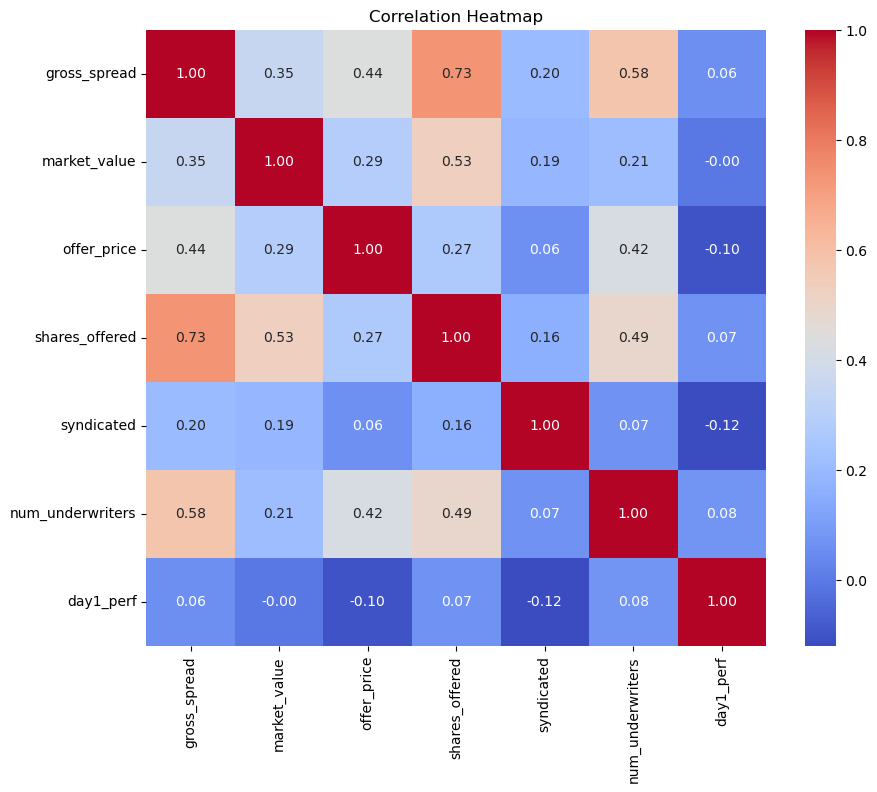

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Kmeans Clustering Model

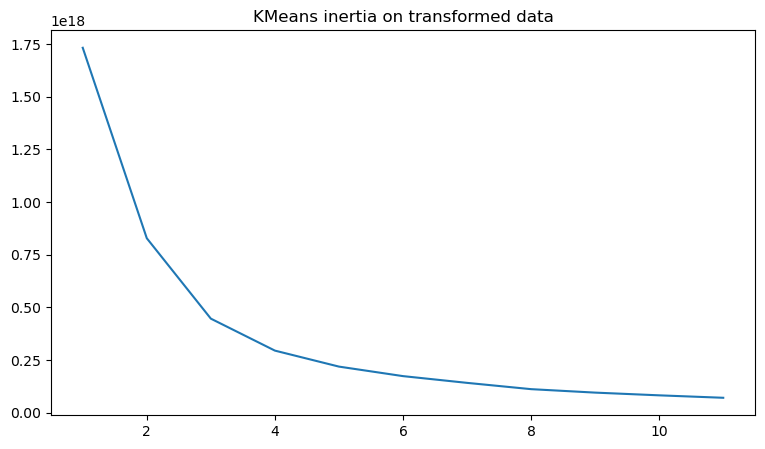

In [19]:
#Determine the number of clusters 
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia_t.append(km.inertia_)

#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')
plt.show()

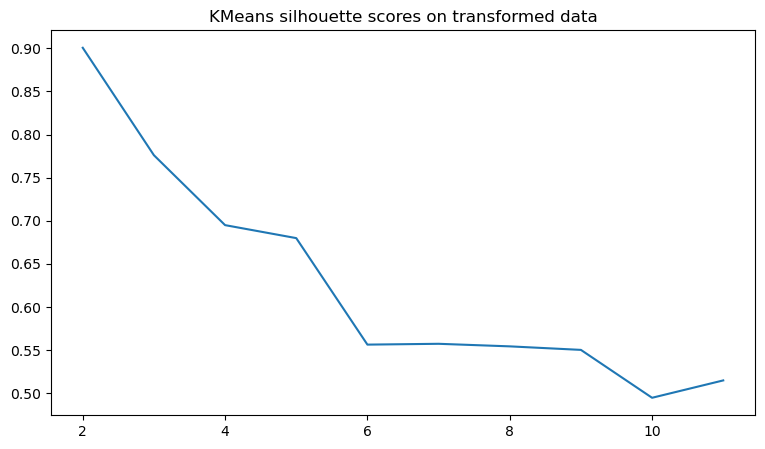

In [20]:
silhouette_scores = []

for i in range(2, 12):  # Considering clusters from 2 to 11
    km = KMeans(n_clusters=i)
    km.fit(df)
    silhouette_scores.append(silhouette_score(df, km.labels_))

#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(2,12), y=silhouette_scores)
plt.title('KMeans silhouette scores on transformed data')
plt.show()

In [21]:
# Chose number of cluster = 4

In [22]:
#Build the model
kmeans4=KMeans(n_clusters=4,n_init=10,max_iter=500)
kmeans4.fit(df)

KMeans(max_iter=500, n_clusters=4, n_init=10)

In [23]:
#Add the clusters into the initial dataframe (centers)
df['clusters']=kmeans4.labels_ 

# take a look at the cluster center
kmeans4.cluster_centers_

array([[8.58777343e+06, 1.03550769e+03, 1.45828054e+01, 8.49589316e+06,
        4.71493213e-01, 5.09411765e+00, 9.45701357e-01],
       [1.01651827e+08, 7.99500000e+03, 2.32400000e+01, 1.05540822e+08,
        9.60000000e-01, 1.53200000e+01, 1.20000000e+00],
       [1.31155406e+08, 3.61463333e+04, 3.01666667e+01, 3.61991913e+08,
        1.00000000e+00, 2.01666667e+01, 1.16666667e+00],
       [3.61299799e+07, 3.10026316e+03, 1.94502924e+01, 3.61424711e+07,
        7.19298246e-01, 9.64327485e+00, 1.14035088e+00]])

In [24]:
df.columns

Index(['gross_spread', 'market_value', 'offer_price', 'shares_offered',
       'syndicated', 'num_underwriters', 'day1_perf', 'clusters'],
      dtype='object')

In [25]:
import plotly.express as px

# Assuming df is your DataFrame with the specified columns

fig = px.scatter_3d(df, x='gross_spread', y='market_value', z='offer_price', color='clusters',
                    symbol='clusters', opacity=0.7, size_max=10,
                    title='3D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

# Save the figure to an HTML file
fig.write_html("3d_scatter_plot.html")


In [28]:
for i in numerical_columns:
    if i!= 'shares_offered':
        fig = px.scatter(df, x=i, y='shares_offered', color='clusters',
                        symbol='clusters', opacity=0.7, size_max=10,
                        title='2D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
        fig.show()
        fig.write_html(f"2d_scatter_plot_{i}.html")